# Problem : 
<img src="Images/db.jpg" width="100%">

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
import numpy as np
import pandas as pd

### Read the dataset

In [3]:
df_pima=pd.read_csv('./Datasets/diabetes.csv')
df_pima.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df_pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Option One : Start Machine Learning on RAW Data 

### Selecting Features 

In [5]:
X = pd.DataFrame(data = df_pima, columns = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"])

y = pd.DataFrame(data = df_pima, columns = ["Outcome"])

## Option Two : Perform Data Pre-processing 

In [6]:
df_pima.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df_pima.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### Replacing 0's with NaNs

In [8]:
df_pima['Glucose'] = df_pima['Glucose'].replace(0, np.nan)
df_pima['BloodPressure'] = df_pima['BloodPressure'].replace(0, np.nan) 
df_pima['SkinThickness'] = df_pima['SkinThickness'].replace(0, np.nan) 
df_pima['Insulin'] = df_pima['Insulin'].replace(0, np.nan)        
df_pima['BMI'] = df_pima['BMI'].replace(0, np.nan) 
df_pima['DiabetesPedigreeFunction'] = df_pima['DiabetesPedigreeFunction'].replace(0, np.nan) 
df_pima['Age'] = df_pima['Age'].replace(0, np.nan)


In [9]:
df_pima.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [10]:
df_pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     763 non-null float64
BloodPressure               733 non-null float64
SkinThickness               541 non-null float64
Insulin                     394 non-null float64
BMI                         757 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


### Replacing NaNs with mean value  

In [11]:
df_pima['BMI'].fillna(df_pima['BMI'].mode(), inplace=True)
df_pima['Glucose'].fillna(df_pima['Glucose'].mode(), inplace=True)
df_pima['BloodPressure'].fillna(df_pima['BloodPressure'].mode(), inplace=True)
df_pima['SkinThickness'].fillna(df_pima['SkinThickness'].mode(), inplace=True)
df_pima['Insulin'].fillna(df_pima['Insulin'].mode(), inplace=True)


In [12]:
df_pima.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,105.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


# Option Three :  Feature Engineering 

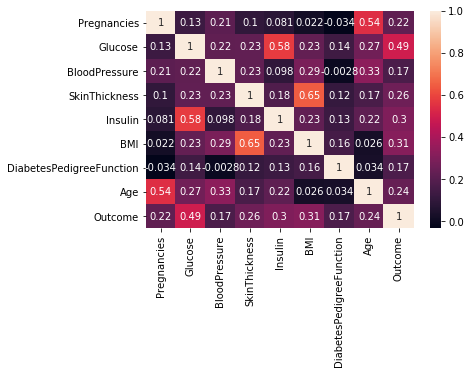

In [13]:
corr = df_pima[df_pima.columns].corr()
sns.heatmap(corr, annot = True)

### Selecting Features 

In [14]:
X = pd.DataFrame(data = df_pima, columns = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"])
#X = pd.DataFrame(data = df_pima, columns = ["Pregnancies","Glucose","SkinThickness","BMI","Age"])
y = pd.DataFrame(data = df_pima, columns = ["Outcome"])

# Option Four : Data Scaling 

In [15]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.63994726,  0.86228736, -0.03274557, ...,  0.16509656,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20222881, -0.51764464, ..., -0.84640379,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.0092408 , -0.67927766, ..., -1.32325395,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02250528, -0.03274557, ..., -0.90420381,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14134521, -1.00254371, ..., -0.34065362,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94006803, -0.19437859, ..., -0.2973036 ,
        -0.47378505, -0.87137393]])

### Split Data into Training & Testing

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)

# Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
model = LogisticRegression(C=0.6,penalty='l2')

In [19]:
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
model.score(X_test,y_test)

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

In [ ]:
model.score(X_test,y_test)


# Decision Trees 

# Support Vector Machine  

In [ ]:
from sklearn.svm import SVC
from sklearn import svm

In [ ]:
model = svm.SVC(kernel='rbf', C=0.03,gamma=0.79)
model.fit(X_train,y_train)

In [ ]:
model.score(X_test,y_test)

### KNN Algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier(n_neighbors=13,metric='euclidean')
model.fit(X_train,y_train)

In [ ]:
model.score(X_test,y_test)